In [1]:
import pandas as pd
import numpy as np
import os
import sys
import sklearn
from sktime.utils.load_data import load_from_tsfile_to_dataframe
from sktime.utils.data_container import from_nested_to_long
from sktime.utils.data_container import tabularize
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sktime.transformers.series_as_features.summarize import TSFreshFeatureExtractor
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sktime.utils.time_series import time_series_slope
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sktime.transformers.series_as_features.summarize import RandomIntervalFeatureExtractor
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sktime.classification.compose import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sktime.series_as_features.compose import FeatureUnion
from sktime.transformers.series_as_features.compose import RowTransformer
from sktime.transformers.series_as_features.reduce import Tabularizer
from sktime.transformers.series_as_features.segment import \
    RandomIntervalSegmenter
from sktime.transformers.series_as_features.compose import ColumnTransformer
from sktime.transformers.series_as_features.compose import RowTransformer
from sktime.transformers.series_as_features.rocket import Rocket
# with sktime, we can write this as a pipeline
from sktime.transformers.series_as_features.reduce import Tabularizer
from sklearn.pipeline import make_pipeline

import sktime as skt
import matplotlib.pyplot as plt
import seaborn as sns
from utils import dataset_selector
pd.set_option('max_colwidth', 4000)
plt.rcParams["figure.figsize"] = (20,3)

display(dataset_selector)

Dropdown(description='Dataset:', options=('ACSF1', 'Adiac', 'AllGestureWiimoteX', 'AllGestureWiimoteY', 'AllGe…

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9'] [10 10 10 10 10 10 10 10 10 10] 



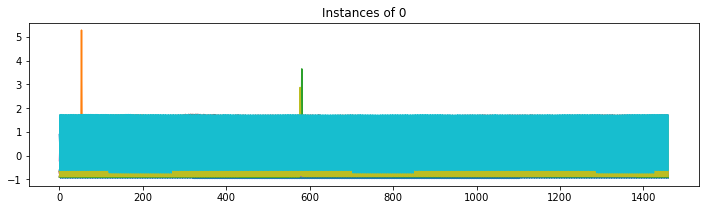

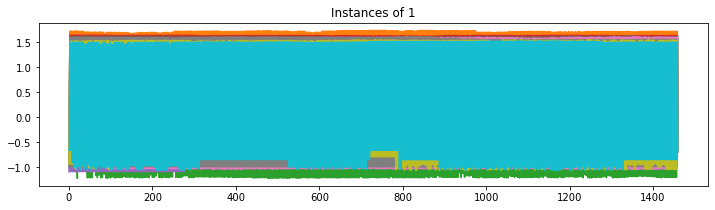

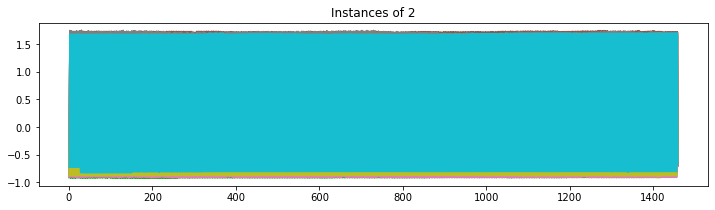

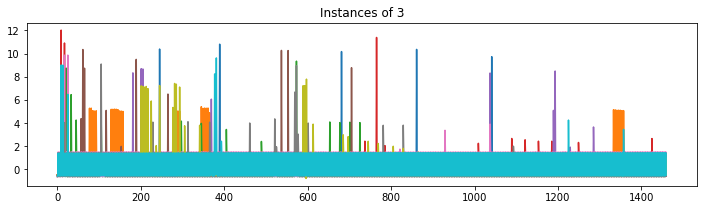

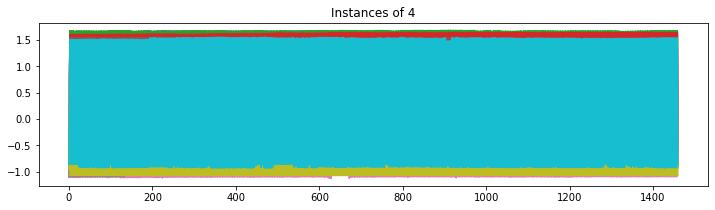

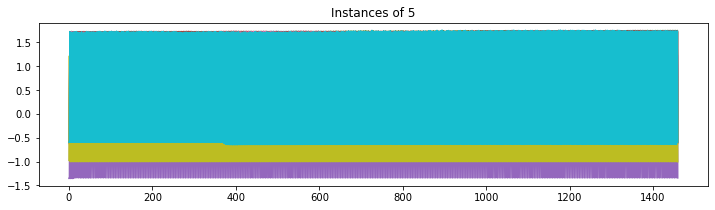

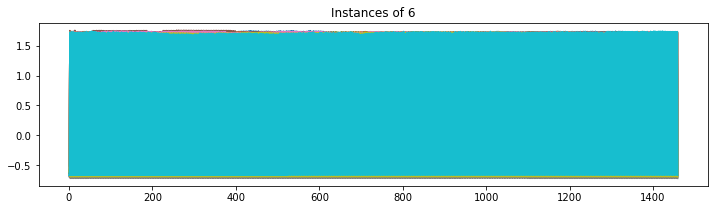

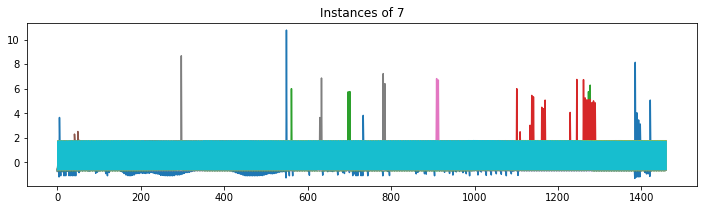

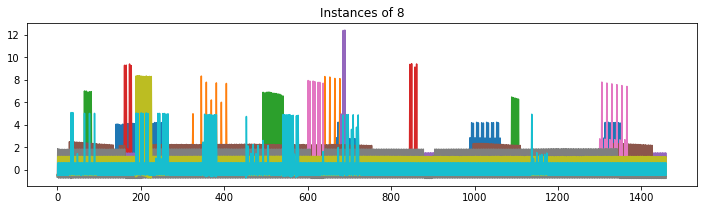

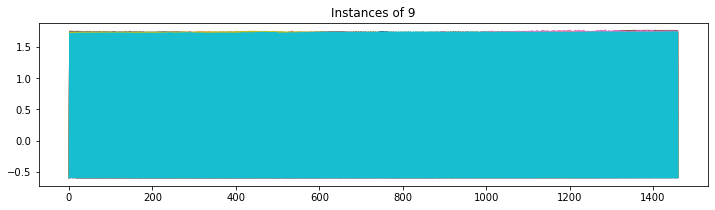

In [2]:
data_folder = 'data/Univariate_ts'
dataset_name = dataset_selector.value
train_dataset_path = os.path.join(data_folder, dataset_name, dataset_name+"_TRAIN.ts")
test_dataset_path = os.path.join(data_folder, dataset_name, dataset_name+"_TEST.ts")
X_train, y_train  = load_from_tsfile_to_dataframe(train_dataset_path, replace_missing_vals_with='Nan')
X_test, y_test = load_from_tsfile_to_dataframe(test_dataset_path, replace_missing_vals_with='NaN')
labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts, '\n')
for label in labels:
    fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
    for instance in X_train.loc[y_train == label, "dim_0"]:
        ax.plot(instance)
    ax.set(title=f"Instances of {label}")

In [27]:
steps = [
    ('extract', RandomIntervalFeatureExtractor(n_intervals='sqrt', features=[np.mean, np.std, time_series_slope])),
    ('clf', DecisionTreeClassifier())
]
time_series_tree = Pipeline(steps)

In [28]:
time_series_tree.fit(X_train, y_train)
time_series_tree.score(X_test, y_test)

0.7319587628865979

In [35]:
rocket_pipeline = make_pipeline(
    Rocket(8000),
    RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)
)
rocket_pipeline.fit(X_train, y_train)
rocket_pipeline.score(X_test, y_test)

0.9037800687285223

In [36]:
from sklearn.metrics import plot_confusion_matrix

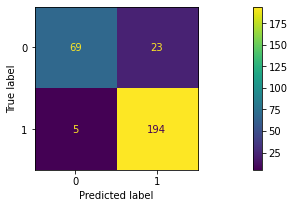

In [37]:
plot_confusion_matrix(rocket_pipeline,X_test,y_test)

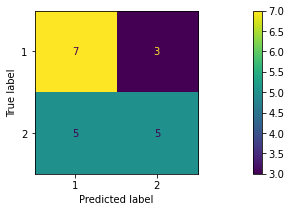

In [8]:
plot_confusion_matrix(time_series_tree,X_test,y_test)

In [3]:
X_train

dim_0
0   0      -0.584754
1      -0.584754
2       1.730991
3      -0.584754
4      -0.584754
          ...   
1455   -0.584734
1456   -0.583729
1457   -0.578603
1458    1.732726
1459   -0.584734
Length: 1460, dtype: float64
1   0      -0.591434
1      -0.511104
2       1.726820
3      -0.580422
4      -0.591434
          ...   
1455   -0.580731
1456   -0.580731
1457   -0.580731
1458    1.727396
1459   -0.580731
Length: 1460, dtype: float64
2   0      -0.577945
1      -0.577945
2       1.730793
3      -0.577945
4      -0.578946
          ...   
1455   -0.577751
1456   -0.580956
1457   -0.549798
1458    1.734727
1459   -0.577751
Length: 1460, dtype: float64
3   0      -0.588925
1      -0.538088
2       1.735718
3      -0.588716
4      -0.589962
          ...   
1455   -0.588876
1456   -0.586852
1457   -0.576483
1458    1.743664
1459   -0.588876
Length: 1460, dtype: float64
4   0      -0.596633
1      -0.532188
2       1.718067
3      -0.592117
4      -0.596633
          ...   
1455   -0.592403
1456   -0.591524
1457   -0.575158
1458    1.743258
1459   -0.592403
Length: 1460, dtype: float64
..                                                                                                                                                                                                                      ...
95  0      -0.706092
1      -0.706092
2       1.619903
3      -0.706092
4      -0.706092
          ...   
1455   -0.702217
1456   -0.956546
1457    0.122643
1458    1.621752
1459   -0.702217
Length: 1460, dtype: float64
96  0      -0.634760
1      -0.634760
2       1.584916
3      -0.634760
4      -0.634760
          ...   
1455   -0.631032
1456   -1.039049
1457    0.085802
1458    1.608606
1459   -0.631032
Length: 1460, dtype: float64
97  0      -0.998277
1       0.102462
2       1.606925
3      -0.692702
4      -0.998277
          ...   
1455   -0.692653
1456   -0.991113
1457    0.099389
1458    1.563691
1459   -0.692653
Length: 1460, dtype: float64
98  0      -0.941473
1       0.587214
2       1.523644
3      -0.645350
4      -0.938475
          ...   
1455   -0.645292
1456   -1.046250
1457    0.582230
1458    1.548224
1459   -0.645292
Length: 1460, dtype: float64
99  0      -0.661536
1      -0.661536
2       1.510327
3      -0.661536
4      -0.661536
          ...   
1455   -0.660685
1456   -0.851728
1457   -0.660539
1458    1.510105
1459   -0.660685
Length: 1460, dtype: float64

[100 rows x 1 columns]